In [1]:
## Reading the preprocessed dataset 
import pandas as pd
df = pd.read_csv(r'/Users/noortje/Documents/880502-M-18 | Master Thesis/Python/RQ2 dataset.csv')

## Reviewing the loaded dataset
df

,f_beer,f_dairy,f_eggs,f_fats_oils,f_meat_red,f_sauces,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,health_status
0,0.017064,0.136988,0.012324,0.020540,0.047401,0.010744,0.002844,0.117238,0.004898,0.016906,0.035709,0
1,0.010780,0.122793,0.013592,0.021559,0.039681,0.007655,0.003281,0.147477,0.005468,0.020934,0.032807,0
2,0.012287,0.144925,0.016664,0.021882,0.037872,0.006228,0.002525,0.133479,0.005555,0.022218,0.035516,0
3,0.012327,0.154237,0.009245,0.022034,0.047920,0.009091,0.002773,0.131741,0.004622,0.014792,0.025732,0
4,0.020667,0.127989,0.012105,0.021258,0.042663,0.008119,0.002657,0.124594,0.002214,0.022586,0.040301,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51290,0.021021,0.060060,0.003003,0.018018,0.012012,0.009009,0.009009,0.276276,0.003003,0.003003,0.003003,0
51291,0.011080,0.138504,0.002770,0.033241,0.016620,0.005540,0.002770,0.174515,0.016620,0.016620,0.002770,0
51292,0.004988,0.122195,0.007481,0.009975,0.017456,0.004988,0.007481,0.174564,0.022444,0.042394,0.012469,0
51293,0.030369,0.104121,0.002169,0.006508,0.049892,0.002169,0.002169,0.197397,0.015184,0.021692,0.004338,0


In [3]:
## RANDOM FOREST: IMPLEMENTATION FOR RQ2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
import numpy as np

## Assign data to X and Y
X = df.drop('health_status', axis=1).values
Y = df['health_status'].values

## Splitting the data into a training and testing set
X_main, X_test, y_main, y_test = train_test_split(X, Y, 
test_size = 0.23, random_state = 42, stratify=Y)

## Splitting the main set into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, 
test_size = 0.18, random_state = 42, stratify=y_main)

## Feature scaling using RobustScaler to put all features to the same scale
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Implementing SMOTE on training data, to train the model on a balanced dataset
smote = SMOTE(random_state=101, sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_train, y_train)

## Assigning sample weights
weights = np.zeros(len(y_res))
weights[y_res == 1] = 0.999
weights[y_res == 0] = 0.001

## Defining and fitting the model
model1 = RandomForestClassifier(random_state=101,
n_estimators = 391, min_samples_split = 10, min_samples_leaf = 4, max_samples = 100,
max_features = 'log2', max_depth = 15) 

model1.fit(X_res, y_res, sample_weight = weights)

## Making predictions for every partition of the dataset 
pred_val = model1.predict(X_val) 
pred_train = model1.predict(X_train) 

## Evaluating the model performance
print('Balanced accuracy on validation data =', balanced_accuracy_score(y_val, pred_val))
print('Recall-score (positive class) on validation data =', recall_score(y_val, pred_val, pos_label = 1))
print('----------------------------------------------------------------------------------------------')
print('Checking for model overfitting by computing the evaluation metric on training data:')
print('-----------------')
print('Balanced accuracy on training data =', balanced_accuracy_score(y_train, pred_train))
print('Recall-score (positive class) on training data =', recall_score(y_train, pred_train, pos_label = 1))

Balanced accuracy on validation data = 0.8599866234863418
Recall-score (positive class) on validation data = 0.875
----------------------------------------------------------------------------------------------
Checking for model overfitting by computing the evaluation metric on training data:
-----------------
Balanced accuracy on training data = 0.9243431221020093
Recall-score (positive class) on training data = 1.0


In [4]:
## FINAL TRAINING ITERATION FOR GBDT - RQ1
## Feature scaling using RobustScaler to put all features to the same scale
scaler = RobustScaler()
X_main_scaled = scaler.fit_transform(X_main)
X_test_scaled = scaler.transform(X_test)

## Implementing SMOTE on training data, to train the model on a balanced dataset
smote = SMOTE(random_state=101, sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_main_scaled, y_main)

## Assigning sample weights
weights = np.zeros(len(y_res))
weights[y_res == 1] = 0.999
weights[y_res == 0] = 0.001

model1.fit(X_res, y_res, sample_weight = weights)

## Defining and fitting the model
model1 = RandomForestClassifier(random_state=101,
n_estimators = 391, min_samples_split = 10, min_samples_leaf = 4, max_samples = 100,
max_features = 'log2', max_depth = 15) 

model1.fit(X_res, y_res, sample_weight = weights)

## Making predictions for the testing partition of the dataset
pred_test_rf = model1.predict(X_test_scaled)
pred_train = model1.predict(X_main_scaled)

## Unbiased estimate on unseen data
print('Checking the final model performance by computing the evaluation metric on unseen testing data:')
print('-----------------')
print('Balanced accuracy on testing data =', balanced_accuracy_score(y_test, pred_test_rf))
print('Recall-score (positive class) on testing data =', recall_score(y_test, pred_test_rf, pos_label = 1))
print('-----------------')
print('Balanced accuracy on training data =', balanced_accuracy_score(y_main, pred_train))
print('Recall-score (positive class) on training data =', recall_score(y_main, pred_train, pos_label = 1))

Checking the final model performance by computing the evaluation metric on unseen testing data:
-----------------
Balanced accuracy on testing data = 0.8897947194934892
Recall-score (positive class) on testing data = 0.9230769230769231
-----------------
Balanced accuracy on training data = 0.8952380952380952
Recall-score (positive class) on training data = 0.9333333333333333


In [ ]:
## HYPERPARAMETER TUNING PROCESS FOR RQ2 - RANDOM FOREST
## Source of code: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 
## Random search iteration 1: 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

## Creating the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start=5, stop = 700, num = 10)],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [int(x) for x in np.linspace(start=1, stop = 15, num = 5)],
            'min_samples_split': [int(x) for x in np.linspace(start=1, stop = 30, num = 5)],
            'min_samples_leaf': [int(x) for x in np.linspace(start=1, stop = 30, num = 5)],
            'max_samples': [int(x) for x in np.linspace(start=100, stop = 600, num = 10)]}

## Creating the model to tune
rf = RandomForestClassifier(random_state=101, class_weight = {'Unhealthy': 0.999, 'Healthy': 0.001})

## Random search procedure of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=101, n_jobs = -1)

## Fitting the random search model to the previously defined resampled dataset using SMOTE
rf_random.fit(X_res, y_res)

## Retrieving the best model parameters according to this iteration
rf_random.best_params_

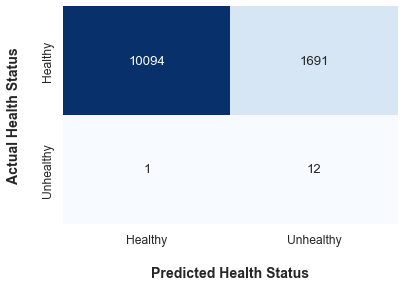

In [5]:
## Creating the confusion matrix for RF - RQ2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining the confusion matrix
conf = confusion_matrix(y_test, pred_test_rf)

## Change figure size and font size
plt.figure(figsize=(6,4))
sns.set(font_scale = 1.1)

## Plotting confusion matrix
ax = sns.heatmap(conf, annot=True, fmt='d', cmap = 'Blues', cbar=False)
ax.set_xlabel("Predicted Health Status", fontsize=14, labelpad=20, fontweight = 'bold')
ax.xaxis.set_ticklabels(['Healthy', 'Unhealthy'])
ax.set_ylabel("Actual Health Status", fontsize=14, labelpad=20, fontweight = 'bold')
ax.yaxis.set_ticklabels(['Healthy', 'Unhealthy'])
plt.show()

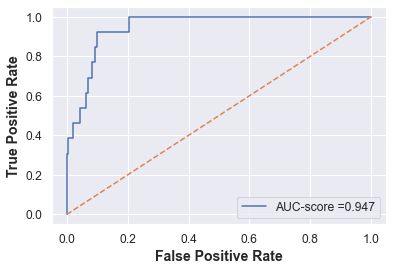

In [6]:
## Creating a ROC curve for RF RQ2
## Source of code: https://www.statology.org/plot-roc-curve-python/
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

## Defining the metrics
y_pred_proba_rf = model1.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba_rf, pos_label = 1)
auc = roc_auc_score(y_test, y_pred_proba_rf)

# Plotting the curve
plt.plot(fpr,tpr, label='AUC-score ='+str(f'{auc:.3f}'))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate', fontsize = 14, fontweight = 'bold')
plt.xlabel('False Positive Rate', fontsize = 14, fontweight = 'bold')
plt.legend(loc=4)
plt.show()

In [7]:
## Error Analysis for RF - RQ2 - Obtaining a column indicating the misclassified instances
## Retrieving the feature names from the dataframe
feature_names = list(df.columns[:-1])

## Create a new dataframe for testing instances with feature names as column names
test_df = pd.DataFrame(X_test, columns=feature_names)

## Add the target feature 'health_status' to the dataframe
test_df2 = test_df.assign(health_status = y_test)

## Identifying the misclassified instances
misclassified = pred_test_rf != y_test

## Adding the column to the new dataset
test_df3 = test_df2.assign(misclassified_inst = misclassified)

## Reviewing the operation
test_df3

,f_beer,f_dairy,f_eggs,f_fats_oils,f_meat_red,f_sauces,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,health_status,misclassified_inst
0,0.009044,0.079134,0.014212,0.028908,0.043443,0.016311,0.005006,0.140988,0.012435,0.050872,0.006783,0,False
1,0.013348,0.086851,0.011093,0.036706,0.051677,0.021465,0.002796,0.130411,0.008027,0.031385,0.019841,0,False
2,0.018953,0.146766,0.010306,0.028785,0.042999,0.010187,0.002132,0.105544,0.007344,0.013978,0.034589,0,False
3,0.015264,0.111452,0.010387,0.029805,0.058345,0.016799,0.001716,0.141348,0.007135,0.020592,0.023754,0,False
4,0.004176,0.096056,0.008817,0.038979,0.056148,0.012993,0.001392,0.168445,0.008353,0.035267,0.008817,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11793,0.007455,0.090077,0.010998,0.026740,0.042513,0.008934,0.003912,0.126367,0.006161,0.047503,0.010258,0,False
11794,0.039803,0.095199,0.013131,0.020927,0.032417,0.011900,0.004924,0.146492,0.005334,0.046779,0.036931,0,False
11795,0.008310,0.112020,0.014043,0.037748,0.045800,0.013592,0.003414,0.164004,0.007021,0.050696,0.009534,0,False
11796,0.014458,0.118072,0.002410,0.016867,0.038554,0.007229,0.002410,0.267470,0.014458,0.031325,0.004819,0,True


In [8]:
## Checking the median values for every feature
# NOTE: This code block was re-used for every feature, i.e., feature name replaced for every feature

## Obtaining the misclassified "healthy" cases
rows_unhealthy_TP = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == False)]
rows_unhealthy_FP = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == True)]

## Obtaining the median of all features for the correctly and incorrectly classified instances
median_male_TP = rows_unhealthy_TP['f_beer'].median()
median_male_FP = rows_unhealthy_FP['f_beer'].median()

## Reviewing the results
print('Median value for correctly classified "f_beer" feature =', median_male_TP)
print('Median value for miscorrectly classified "f_beer" feature =', median_male_FP)

Median value for correctly classified "f_beer" feature = 0.010425402701061251
Median value for miscorrectly classified "f_beer" feature = 0.0097297297297297


In [9]:
## Mann Whitney U test for comparing median values obtained in the previous step
# NOTE: This code block was re-used for every class, i.e., feature name was replaced
import scipy.stats as stats
import numpy as np

## Obtaining two groups with the particular median value
rows_healthy_TN = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == False)]
rows_healthy_FN = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == True)]
group1 = rows_healthy_TN['f_beer'].values
group2 = rows_healthy_FN['f_beer'].values

#perform the Mann-Whitney U test
s, p = stats.mannwhitneyu(group1, group2)
print('Statistic =', s, 'p-value =', p)

Statistic = 7.0 p-value = 0.9230769230769231


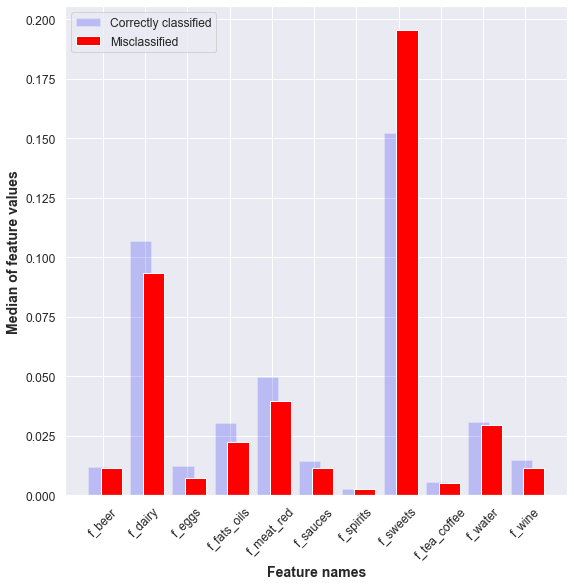

In [10]:
## Obtaining a bar chart to illustrate overall misclassification pattern for RF - RQ2
import matplotlib.pyplot as plt
import seaborn as sns

## Creating the arrays
rows_correct = test_df3[(test_df3['misclassified_inst'] == False)]
rows_incorrect = test_df3[(test_df3['misclassified_inst'] == True)]

rows_correct = rows_correct.drop('misclassified_inst', axis = 1)
rows_correct = rows_correct.drop('health_status', axis = 1)

rows_incorrect = rows_incorrect.drop('misclassified_inst', axis = 1)
rows_incorrect = rows_incorrect.drop('health_status', axis = 1)

## Obtaining the medians for every group
medians = rows_correct.median().values
medians2 = rows_incorrect.median().values

## Defining X, Y and Z
X = ['f_beer','f_dairy', 'f_eggs', 'f_fats_oils', 'f_meat_red', 'f_sauces',
'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine']
Ycorrect = medians
Zincorrect = medians2

## Obtaining the plot
X_axis = np.arange(len(X))
plt.figure(figsize=(9, 9))   
plt.bar(X_axis - 0.1, Ycorrect, 0.5, label = 'Correctly classified', color = 'blue', alpha = 0.2)
plt.bar(X_axis + 0.2, Zincorrect, 0.5, label = 'Misclassified', color =  'red')
plt.xticks(X_axis, X, rotation = 45)
plt.xlabel("Feature names", fontsize = 14, fontweight = 'bold')
plt.ylabel("Median of feature values", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

In [12]:
## GRADIENT BOOSTED DECISION TREE: IMPLEMENTATION FOR RQ2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
import numpy as np

## Assign data to X and Y
X = df.drop('health_status', axis=1).values
Y = df['health_status'].values

## Splitting the data into a training and testing set
X_main, X_test, y_main, y_test = train_test_split(X, Y, 
test_size = 0.23, random_state = 42, stratify=Y)

## Splitting the main set into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, 
test_size = 0.18, random_state = 42, stratify=y_main)

## Feature scaling using RobustScaler to put all features to the same scale
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Implementing SMOTE on training data, to train the model on a balanced dataset
smote = SMOTE(random_state=101, sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_train, y_train)

## Assigning sample weights
weights = np.zeros(len(y_res))
weights[y_res == 1] = 0.999
weights[y_res == 0] = 0.001

## Defining and fitting the model
model2 = GradientBoostingClassifier(random_state=101, subsample = 0.5,
n_estimators = 100, min_samples_split = 50, min_samples_leaf = 120,
max_depth = 3, learning_rate = 0.6)

model2.fit(X_res, y_res, sample_weight = weights)

## Making predictions for every partition of the dataset 
pred_val = model2.predict(X_val) 
pred_train = model2.predict(X_train) 

## Evaluating the model performance
print('Balanced accuracy on validation data =', balanced_accuracy_score(y_val, pred_val))
print('Recall-score (positive class) on validation data =', recall_score(y_val, pred_val, pos_label = 1))
print('----------------------------------------------------------------------------------------------')
print('Checking for model overfitting by computing the evaluation metric on training data:')
print('-----------------')
print('Balanced accuracy on training data =', balanced_accuracy_score(y_train, pred_train))
print('Recall-score (positive class) on training data =', recall_score(y_train, pred_train, pos_label = 1))

Balanced accuracy on validation data = 0.8752640101379894
Recall-score (positive class) on validation data = 0.875
----------------------------------------------------------------------------------------------
Checking for model overfitting by computing the evaluation metric on training data:
-----------------
Balanced accuracy on training data = 0.913683946697857
Recall-score (positive class) on training data = 0.9459459459459459


In [13]:
## FINAL TRAINING ITERATION FOR GBDT - RQ2
## Feature scaling using RobustScaler to put all features to the same scale
scaler = RobustScaler()
X_main_scaled = scaler.fit_transform(X_main)
X_test_scaled = scaler.transform(X_test)

## Implementing SMOTE on training data, to train the model on a balanced dataset
smote = SMOTE(random_state=101, sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_main_scaled, y_main)

## Assigning sample weights
weights = np.zeros(len(y_res))
weights[y_res == 1] = 0.999
weights[y_res == 0] = 0.001

## Defining and fitting the model
model2 = GradientBoostingClassifier(random_state=101, subsample = 0.5,
n_estimators = 100, min_samples_split = 50, min_samples_leaf = 120,
max_depth = 3, learning_rate = 0.6)

model2.fit(X_res, y_res, sample_weight = weights)

## Making predictions for the testing partition of the dataset
pred_test_gbdt = model2.predict(X_test_scaled)
pred_train = model2.predict(X_main_scaled)

## Unbiased estimate on unseen data
print('Checking the final model performance by computing the evaluation metric on unseen testing data:')
print('-----------------')
print('Balanced accuracy on testing data =', balanced_accuracy_score(y_test, pred_test_gbdt))
print('Recall-score (positive class) on testing data =', recall_score(y_test, pred_test_gbdt, pos_label = 1))
print('-----------------')
print('Balanced accuracy on training data =', balanced_accuracy_score(y_main, pred_train))
print('Recall-score (positive class) on training data =', recall_score(y_main, pred_train, pos_label = 1))

Checking the final model performance by computing the evaluation metric on unseen testing data:
-----------------
Balanced accuracy on testing data = 0.840174929016677
Recall-score (positive class) on testing data = 0.8461538461538461
-----------------
Balanced accuracy on training data = 0.8871523201189631
Recall-score (positive class) on training data = 0.9333333333333333


In [ ]:
## HYPERPARAMETER TUNING PROCESS FOR RQ2 - GRADIENT BOOSTED DECISION TREE
## Source of code: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 
## Random search iteration 1: 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

## Creating the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start=5, stop = 700, num = 10)],
            'learning_rate': [0.2, 0.5, 0.7],
            'max_depth': [int(x) for x in np.linspace(start=1, stop = 10, num = 5)],
            'min_samples_split': [int(x) for x in np.linspace(start=5, stop = 100, num = 10)],
            'min_samples_leaf': [int(x) for x in np.linspace(start=15, stop = 100, num = 10)],
            'subsample': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}

## Creating the model to tune
rf = GradientBoostingClassifier(random_state=101)

## Random search procedure of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=101, n_jobs = -1)

## Fitting the random search model to the previously defined resampled dataset using SMOTE
rf_random.fit(X_res, y_res, sample_weight = weights)

## Retrieving the best model parameters according to this iteration
rf_random.best_params_

In [ ]:
## HYPERPARAMETER TUNING PROCESS FOR RQ2 - GRADIENT BOOSTED DECISION TREE
## Source of code: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 
## Random search iteration 2: 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

## Creating the random grid
random_grid = {'n_estimators': [700, 800, 900],
            'learning_rate': [0.2, 0.3],
            'max_depth': [2, 3, 4],
            'min_samples_split': [int(x) for x in np.linspace(start=55, stop = 100, num = 10)],
            'min_samples_leaf': [int(x) for x in np.linspace(start=60, stop = 150, num = 10)],
            'subsample': [0.5, 0.6]}

## Creating the model to tune
rf = GradientBoostingClassifier(random_state=101)

## Random search procedure of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=101, n_jobs = -1)

## Fitting the random search model to the previously defined resampled dataset using SMOTE
rf_random.fit(X_res, y_res, sample_weight = weights)

## Retrieving the best model parameters according to this iteration
rf_random.best_params_

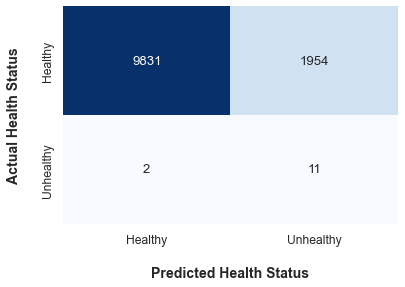

In [14]:
## Creating the confusion matrix for GBDT - RQ2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining the confusion matrix
conf = confusion_matrix(y_test, pred_test_gbdt)

## Change figure size and font size
plt.figure(figsize=(6,4))
sns.set(font_scale = 1.1)

## Plotting confusion matrix
ax = sns.heatmap(conf, annot=True, fmt='d', cmap = 'Blues', cbar=False)
ax.set_xlabel("Predicted Health Status", fontsize=14, labelpad=20, fontweight = 'bold')
ax.xaxis.set_ticklabels(['Healthy', 'Unhealthy'])
ax.set_ylabel("Actual Health Status", fontsize=14, labelpad=20, fontweight = 'bold')
ax.yaxis.set_ticklabels(['Healthy', 'Unhealthy'])
plt.show()

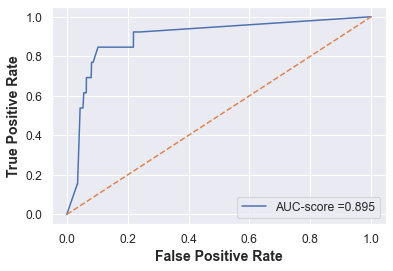

In [15]:
## Creating a ROC curve for GBDT RQ2
## Source of code: https://www.statology.org/plot-roc-curve-python/
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

## Define the metrics
y_pred_proba_gbdt = model2.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_gbdt, pos_label = 1)
auc = roc_auc_score(y_test, y_pred_proba_gbdt)

# Plotting the curve
plt.plot(fpr,tpr, label='AUC-score ='+str(f'{auc:.3f}'))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate', fontsize = 14, fontweight = 'bold')
plt.xlabel('False Positive Rate', fontsize = 14, fontweight = 'bold')
plt.legend(loc=4)
plt.show()

In [16]:
## Error Analysis for GBDT - RQ2 - Obtaining a column indicating the misclassified instances
## Retrieving the feature names from the dataframe
feature_names = list(df.columns[:-1])

## Create a new dataframe for testing instances with feature names as column names
test_df = pd.DataFrame(X_test, columns=feature_names)

## Add the target feature 'health_status' to the dataframe
test_df2 = test_df.assign(health_status = y_test)

## Identifying the misclassified instances
misclassified = pred_test_gbdt != y_test

## Adding the column to the new dataset
test_df3 = test_df2.assign(misclassified_inst = misclassified)

## Reviewing the operation
test_df3

,f_beer,f_dairy,f_eggs,f_fats_oils,f_meat_red,f_sauces,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,health_status,misclassified_inst
0,0.009044,0.079134,0.014212,0.028908,0.043443,0.016311,0.005006,0.140988,0.012435,0.050872,0.006783,0,False
1,0.013348,0.086851,0.011093,0.036706,0.051677,0.021465,0.002796,0.130411,0.008027,0.031385,0.019841,0,False
2,0.018953,0.146766,0.010306,0.028785,0.042999,0.010187,0.002132,0.105544,0.007344,0.013978,0.034589,0,False
3,0.015264,0.111452,0.010387,0.029805,0.058345,0.016799,0.001716,0.141348,0.007135,0.020592,0.023754,0,False
4,0.004176,0.096056,0.008817,0.038979,0.056148,0.012993,0.001392,0.168445,0.008353,0.035267,0.008817,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11793,0.007455,0.090077,0.010998,0.026740,0.042513,0.008934,0.003912,0.126367,0.006161,0.047503,0.010258,0,False
11794,0.039803,0.095199,0.013131,0.020927,0.032417,0.011900,0.004924,0.146492,0.005334,0.046779,0.036931,0,False
11795,0.008310,0.112020,0.014043,0.037748,0.045800,0.013592,0.003414,0.164004,0.007021,0.050696,0.009534,0,False
11796,0.014458,0.118072,0.002410,0.016867,0.038554,0.007229,0.002410,0.267470,0.014458,0.031325,0.004819,0,True


In [17]:
## Checking the median values for every feature
# NOTE: This code block was re-used for every feature, i.e., feature name replaced for every feature

## Obtaining the misclassified "healthy" cases
rows_unhealthy_TP = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == False)]
rows_unhealthy_FP = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == True)]

## Obtaining the median of all features for the correctly and incorrectly classified instances
median_male_TP = rows_unhealthy_TP['f_beer'].median()
median_male_FP = rows_unhealthy_FP['f_beer'].median()

## Reviewing the results
print('Median value for correctly classified "f_beer" feature =', median_male_TP)
print('Median value for miscorrectly classified "f_beer" feature =', median_male_FP)

Median value for correctly classified "f_beer" feature = 0.0109170305676855
Median value for miscorrectly classified "f_beer" feature = 0.0073732260688782


In [18]:
## Mann Whitney U test for comparing median values obtained in the previous step
# NOTE: This code block was re-used for every class, i.e., feature name was replaced
import scipy.stats as stats
import numpy as np

## Obtaining two groups with the particular median value
rows_healthy_TN = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == False)]
rows_healthy_FN = test_df3[(test_df3['health_status'] == 1) & (test_df3['misclassified_inst'] == True)]
group1 = rows_healthy_TN['f_beer'].values
group2 = rows_healthy_FN['f_beer'].values

#perform the Mann-Whitney U test
s, p = stats.mannwhitneyu(group1, group2)
print('Statistic =', s, 'p-value =', p)

Statistic = 15.0 p-value = 0.5128205128205128


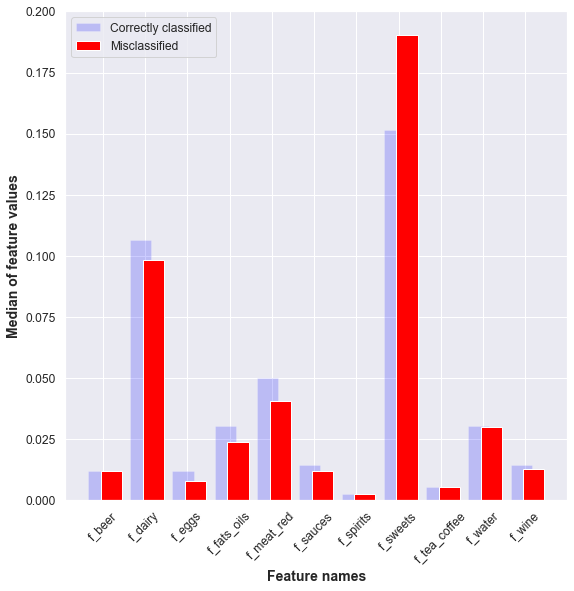

In [19]:
## Obtaining a bar chart to illustrate overall misclassification pattern for GBDT - RQ2
import matplotlib.pyplot as plt
import seaborn as sns

## Creating the arrays
rows_correct = test_df3[(test_df3['misclassified_inst'] == False)]
rows_incorrect = test_df3[(test_df3['misclassified_inst'] == True)]

rows_correct = rows_correct.drop('misclassified_inst', axis = 1)
rows_correct = rows_correct.drop('health_status', axis = 1)

rows_incorrect = rows_incorrect.drop('misclassified_inst', axis = 1)
rows_incorrect = rows_incorrect.drop('health_status', axis = 1)

## Obtaining the medians for every group
medians = rows_correct.median().values
medians2 = rows_incorrect.median().values

## Defining X, Y and Z
X = ['f_beer','f_dairy', 'f_eggs', 'f_fats_oils', 'f_meat_red', 'f_sauces',
'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine']
Ycorrect = medians
Zincorrect = medians2

## Obtaining the plot
X_axis = np.arange(len(X))
plt.figure(figsize=(9, 9))   
plt.bar(X_axis - 0.1, Ycorrect, 0.5, label = 'Correctly classified', color = 'blue', alpha = 0.2)
plt.bar(X_axis + 0.2, Zincorrect, 0.5, label = 'Misclassified', color =  'red')
plt.xticks(X_axis, X, rotation = 45)
plt.xlabel("Feature names", fontsize = 14, fontweight = 'bold')
plt.ylabel("Median of feature values", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

In [20]:
## McNemar test to compare model performance across RF and GBDT
## Source of code: https://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/#:~:text=McNemar%27s%20Test%20Statistic&text=The%20McNemar%20test%20statistic%20(%22chi,a%20significance%20threshold%2C%20e.g%2C.
import numpy as np
from mlxtend.evaluate import mcnemar_table

tb = mcnemar_table(y_target=y_test, 
                   y_model1=pred_test_rf, 
                   y_model2=pred_test_gbdt)

## Performing the actual McNemar Test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb)
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 74.53556034482759
p-value: 5.955578446682719e-18
